### This code is to analyse the GNN data

### Peng Ju @ 2022-12-10

In [176]:
import awkward as ak
import uproot
from glob import glob
import numpy as np

import hist as hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import glob
import random

import os
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator
plt.rcParams.update({'figure.max_open_warning': 0})

In [230]:
# get data file path '.root'
Folder_path = "F:/PHYS_570/Project/Data/DATA/"
os.chdir(Folder_path)

file_path = glob.glob('*.root')
file_path

['15beam0.3mass_hepmc_displaced.root',
 '15beam0.5mass_hepmc_displaced.root',
 '15beam0.7mass_hepmc_displaced.root',
 '15beam0.9mass_hepmc_displaced.root',
 '20beam0.3mass_hepmc_displaced.root',
 '20beam0.5mass_hepmc_displaced.root',
 '20beam0.7mass_hepmc_displaced.root',
 '20beam0.9mass_hepmc_displaced.root',
 'DY_simPU_NEW_FULL_Mar14.root']

In [231]:
file = uproot.open(file_path[0])
file_key = file.keys()[0]
DATA = file[file_key]
DATA.keys()

['eventID',
 'totalTime',
 'allRecoed',
 'allCouldBeRecoed',
 'numNonMatched',
 'nTrueDM',
 'nFakeDM',
 'nFakeTracksTop2',
 'nRealTracks',
 'mainDMRecoed',
 'passHitCuts',
 'n_hits',
 'n_hits_h1x',
 'n_hits_h2x',
 'n_hits_h3x',
 'n_hits_h4x',
 'n_hits_d0x',
 'n_hits_d2x',
 'n_hits_d3px',
 'n_hits_d3mx',
 'n_hits_d0',
 'n_hits_d1',
 'n_hits_d2',
 'n_hits_d3p',
 'n_hits_d3m',
 'n_hits_dp1',
 'n_hits_dp2',
 'hit_detID',
 'hit_elmID',
 'hit_trkID',
 'hit_driftdis',
 'hit_pos',
 'hit_edep',
 'hit_truthx',
 'hit_truthy',
 'hit_truthz',
 'hit_truthpx',
 'hit_truthpy',
 'hit_truthpz',
 'n_truthtracks',
 'truthtrack_charge',
 'truthtrack_x_st1',
 'truthtrack_y_st1',
 'truthtrack_z_st1',
 'truthtrack_px_st1',
 'truthtrack_py_st1',
 'truthtrack_pz_st1',
 'truthtrack_x_st3',
 'truthtrack_y_st3',
 'truthtrack_z_st3',
 'truthtrack_px_st3',
 'truthtrack_py_st3',
 'truthtrack_pz_st3',
 'truthtrack_x_vtx',
 'truthtrack_y_vtx',
 'truthtrack_z_vtx',
 'truthtrack_px_vtx',
 'truthtrack_py_vtx',
 'truthtrac

In [178]:
# choose important features for GNN
features = ['eventID','truthtrack_px_st3','truthtrack_py_st3','truthtrack_pz_st3', 'truthtrack_x_st3','truthtrack_y_st3','truthtrack_z_st3','truthtrack_px_st1','truthtrack_py_st1','truthtrack_pz_st1', 'truthtrack_x_st1','truthtrack_y_st1','truthtrack_z_st1']

In [92]:
# Read data for a single file
path = file_path[-1]
file = uproot.open(path)
print(path, '\n',file.keys())
file_key = file.keys()
    
    
for keys in file_key:
    Event2 = file[keys]
    DATA = pd.DataFrame()
    if features[1] not in Event2.keys():
        break

    for i in range(0,len(features)):
        # print(Event2[0].array())
        temp = Event2[features[i]].array()
        if 'var' in str(temp.type):
            new_coloumn = [] 
            for j in range(len(temp)):
                new_coloumn.append(list(temp[j]))
            res = new_coloumn
        else:
            res = np.array(temp)

        DATA[features[i]] = res

DY_simPU_NEW_FULL_Mar14.root 
 ['Events;1']


In [133]:
len(DATA)

23000

### Plot the xy distribution

15beam0.3mass_hepmc_displaced.root 
 ['Events;2', 'Events;1']
15beam0.5mass_hepmc_displaced.root 
 ['Events;1']
15beam0.7mass_hepmc_displaced.root 
 ['Events;1']
15beam0.9mass_hepmc_displaced.root 
 ['Events;1']
20beam0.3mass_hepmc_displaced.root 
 ['Events;2', 'Events;1']
20beam0.5mass_hepmc_displaced.root 
 ['Events;2', 'Events;1']
20beam0.7mass_hepmc_displaced.root 
 ['Events;2', 'Events;1']
20beam0.9mass_hepmc_displaced.root 
 ['Events;2', 'Events;1']
DY_simPU_NEW_FULL_Mar14.root 
 ['Events;1']


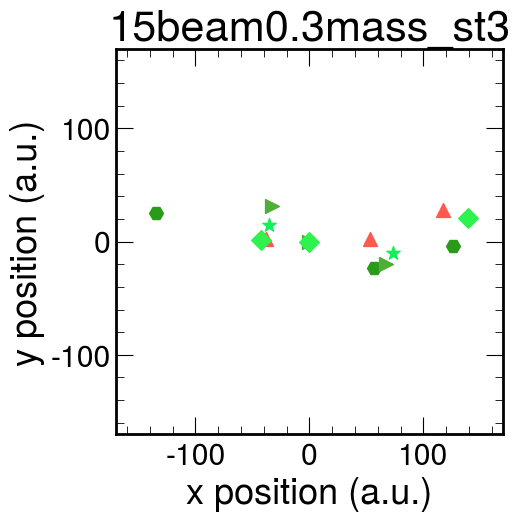

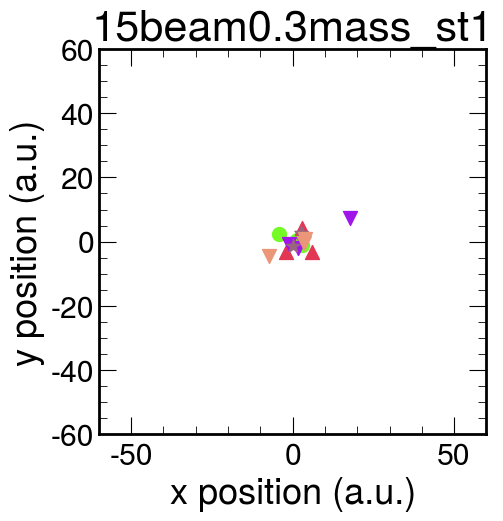

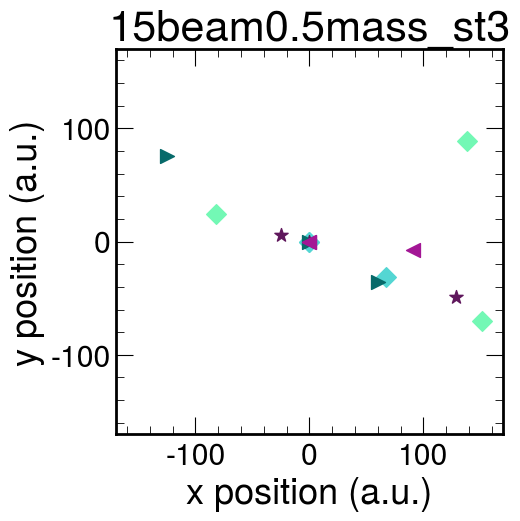

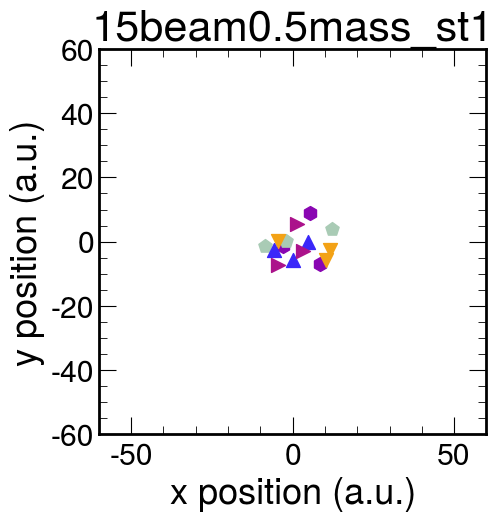

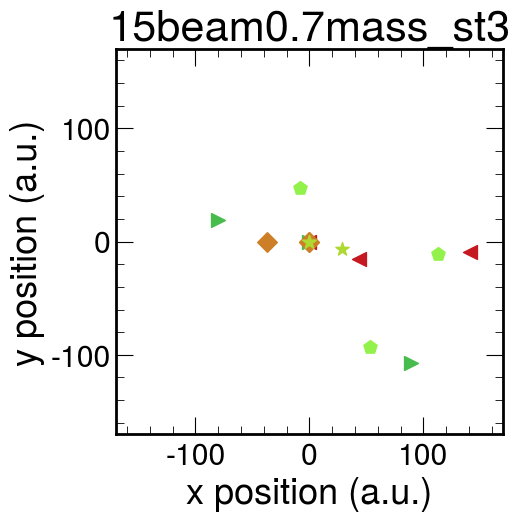

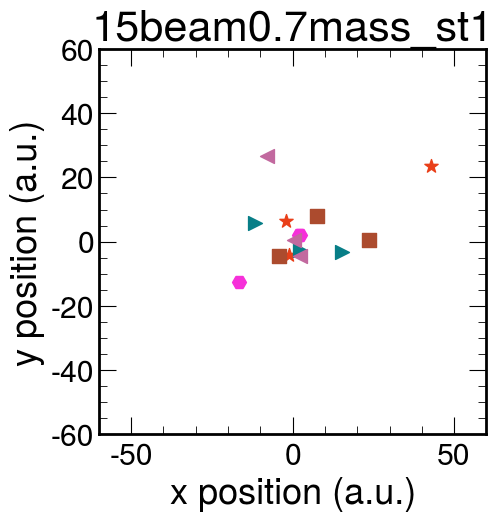

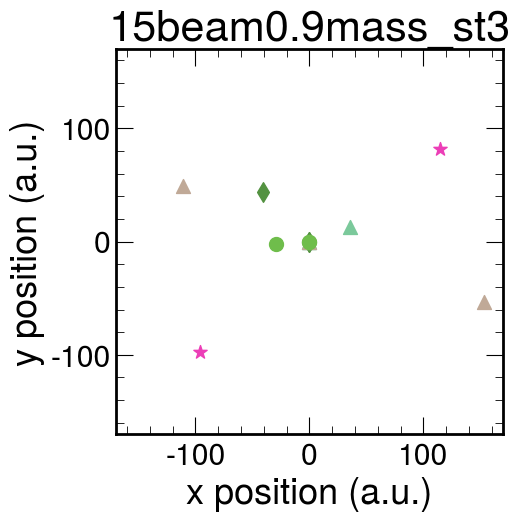

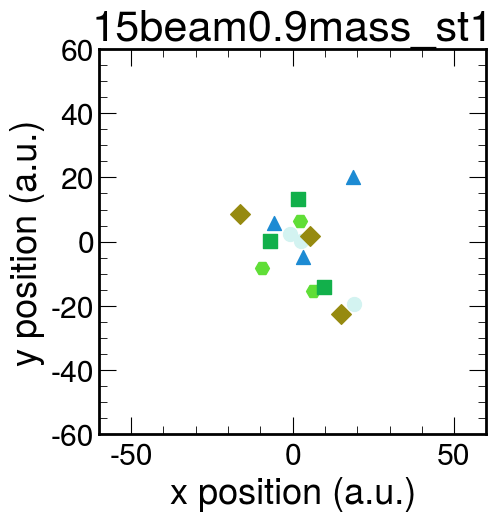

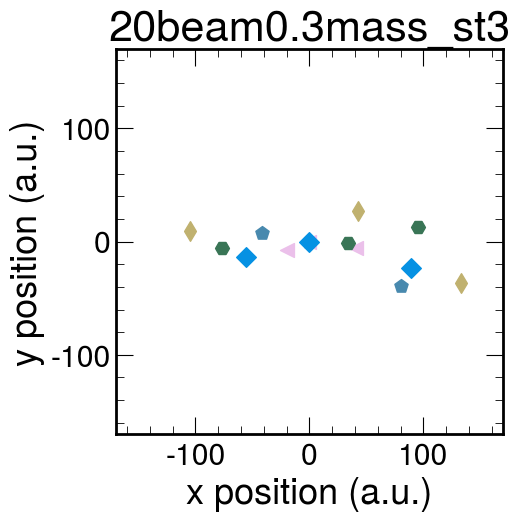

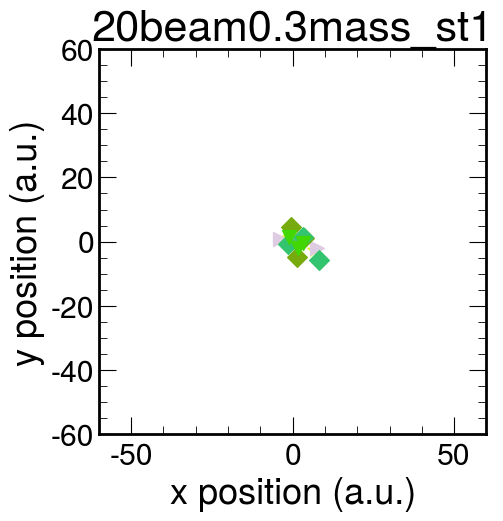

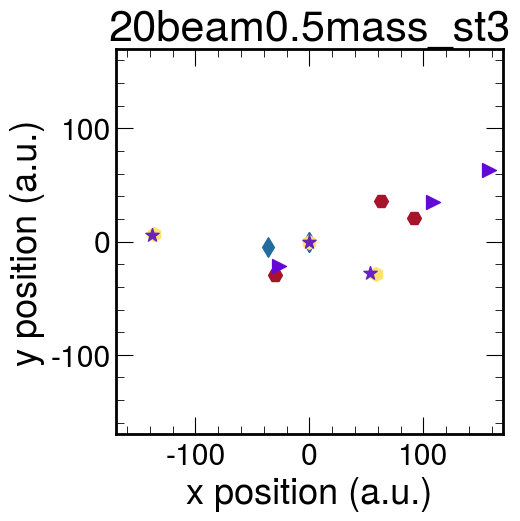

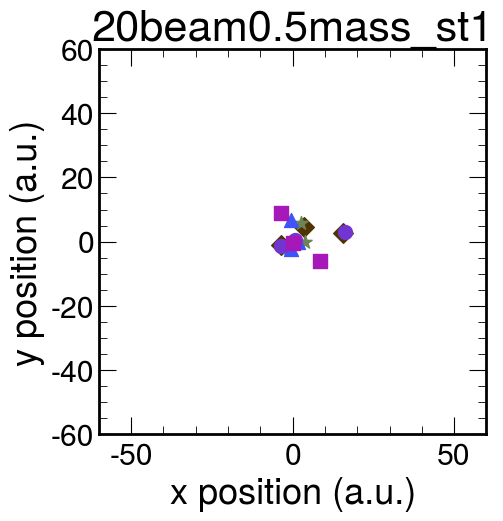

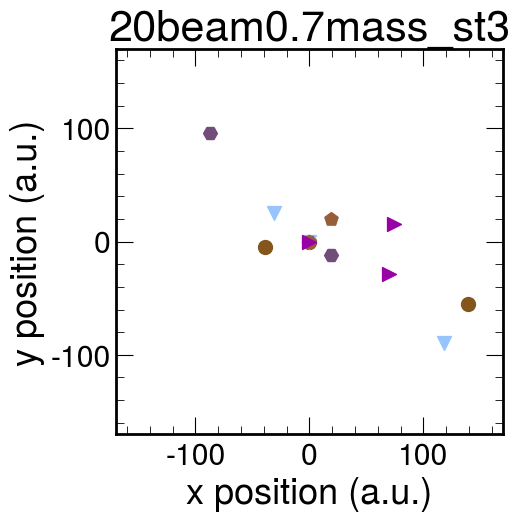

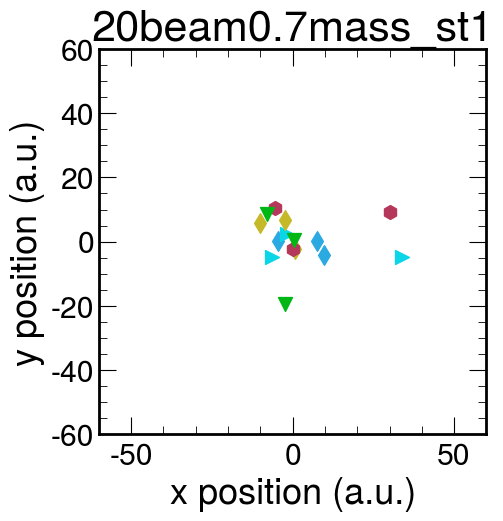

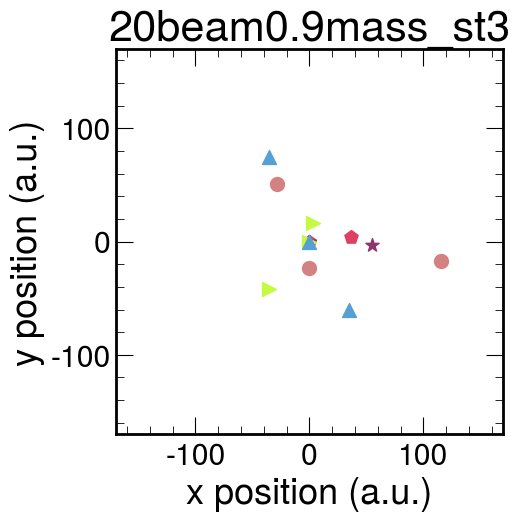

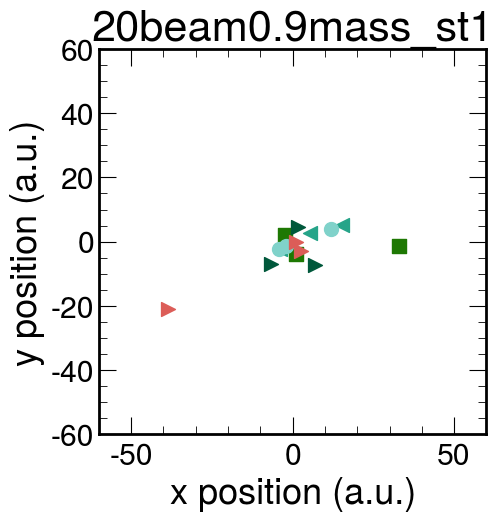

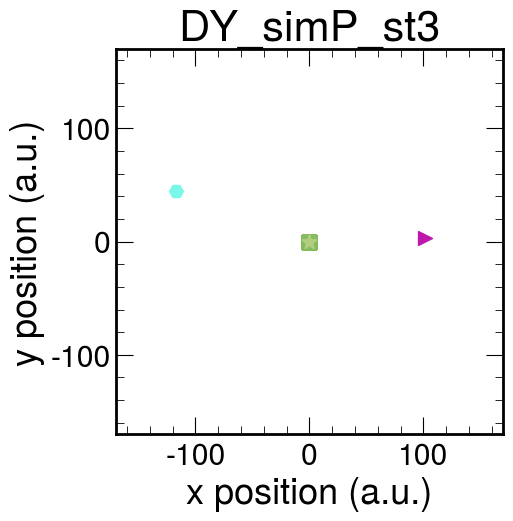

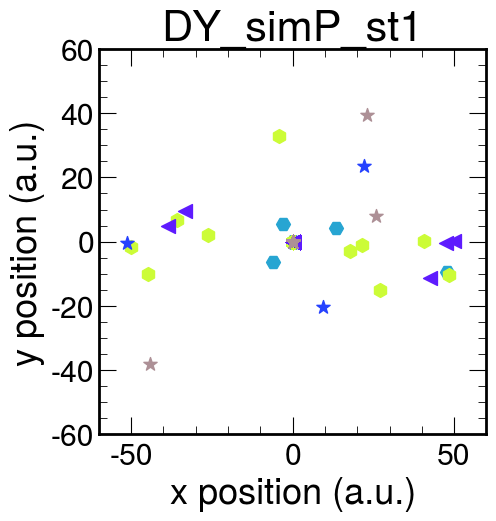

In [202]:
for path in file_path[:]:
    file = uproot.open(path)
    print(path, '\n',file.keys())
    file_key = file.keys()
    
    
    for keys in file_key:
        Event2 = file[keys]
        DATA = pd.DataFrame()
        if features[1] not in Event2.keys():
            break

        for i in range(0,len(features)):
            # print(Event2[0].array())
            temp = Event2[features[i]].array()
            if 'var' in str(temp.type):
                new_coloumn = [] 
                for j in range(len(temp)):
                    new_coloumn.append(list(temp[j]))
                res = new_coloumn
            else:
                res = np.array(temp)
            
            DATA[features[i]] = res
    
    
    plt.figure(figsize = (5,5))

    for i in range(5):
        rand_num = np.random.randint(0, len(DATA))
        rand_colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
        plt.scatter(DATA['truthtrack_x_st3'][rand_num],DATA['truthtrack_y_st3'][rand_num], marker=random.choice(['o','v','^','>','<','s','p','*','h','H','D','d']), c = rand_colors[0], s = 100)
        
    plt.xlim(-170, 170)
    plt.ylim(-170, 170)
    plt.xlabel('x position (a.u.)', loc = 'center')
    plt.ylabel('y position (a.u.)', loc = 'center')
    plt.title(path[:-21]+'_st3')
    plt.savefig('5_event/'+path[:-5]+'_xy_st3.png',bbox_inches='tight')
    
    
    plt.figure(figsize = (5,5))

    for i in range(5):
        rand_num = np.random.randint(0, len(DATA))
        rand_colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
        plt.scatter(DATA['truthtrack_x_st1'][rand_num],DATA['truthtrack_y_st1'][rand_num], marker=random.choice(['o','v','^','>','<','s','p','*','h','H','D','d']), c = rand_colors[0], s = 100)
    
    plt.xlim(-60, 60)
    plt.ylim(-60, 60)    
    plt.xlabel('x position (a.u.)', loc = 'center')
    plt.ylabel('y position (a.u.)', loc = 'center')
    plt.title(path[:-21]+'_st1')
    plt.savefig('5_event/'+path[:-5]+'_xy_st1.png',bbox_inches='tight')    

### Combine signal and background

In [233]:
Signal_path = file_path[:-1]
BG_path = file_path[-1]
BG_path

'DY_simPU_NEW_FULL_Mar14.root'

15beam0.3mass_hepmc_displaced.root 
 ['Events;2', 'Events;1']
15beam0.3mass_hepmc_displaced.root 
 ['Events;1']
15beam0.5mass_hepmc_displaced.root 
 ['Events;1']
15beam0.5mass_hepmc_displaced.root 
 ['Events;1']
15beam0.7mass_hepmc_displaced.root 
 ['Events;1']
15beam0.7mass_hepmc_displaced.root 
 ['Events;1']
15beam0.9mass_hepmc_displaced.root 
 ['Events;1']
15beam0.9mass_hepmc_displaced.root 
 ['Events;1']
20beam0.3mass_hepmc_displaced.root 
 ['Events;2', 'Events;1']
20beam0.3mass_hepmc_displaced.root 
 ['Events;1']
20beam0.5mass_hepmc_displaced.root 
 ['Events;2', 'Events;1']
20beam0.5mass_hepmc_displaced.root 
 ['Events;1']
20beam0.7mass_hepmc_displaced.root 
 ['Events;2', 'Events;1']
20beam0.7mass_hepmc_displaced.root 
 ['Events;1']
20beam0.9mass_hepmc_displaced.root 
 ['Events;2', 'Events;1']
20beam0.9mass_hepmc_displaced.root 
 ['Events;1']


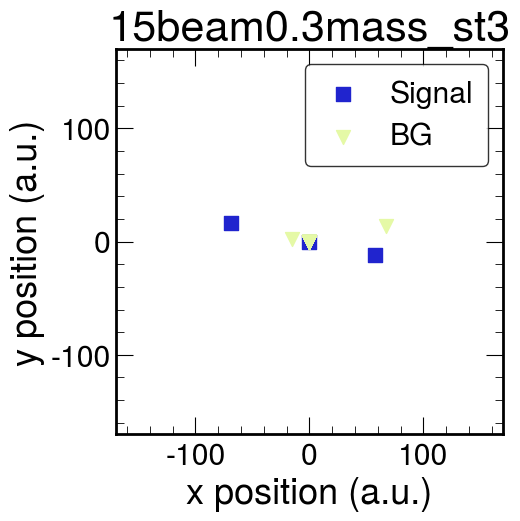

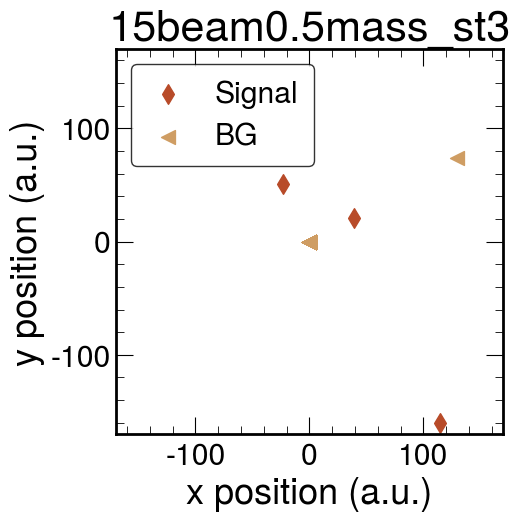

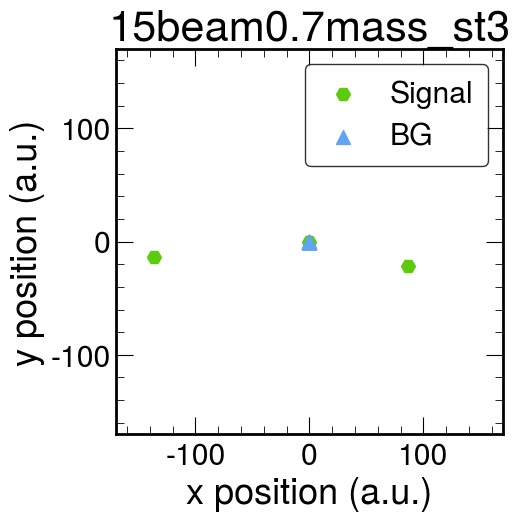

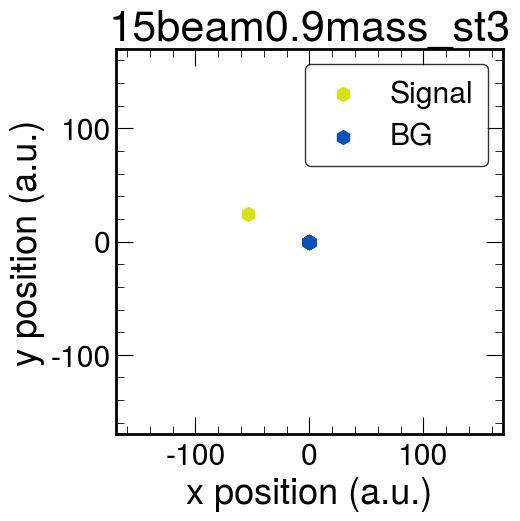

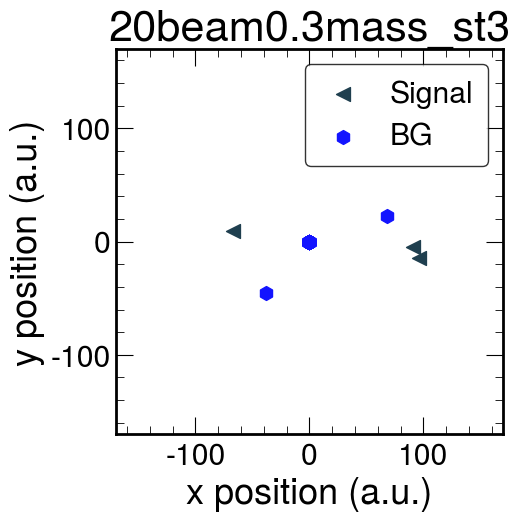

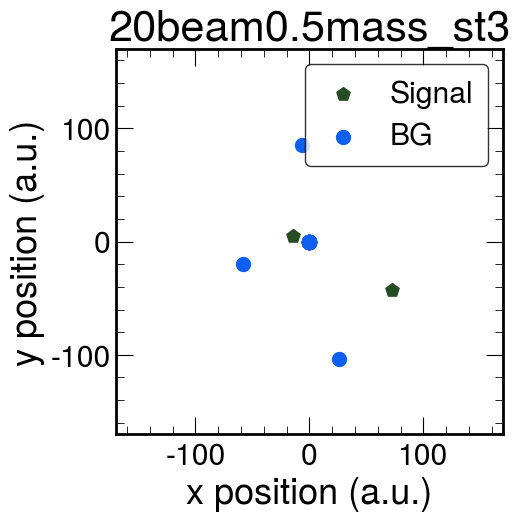

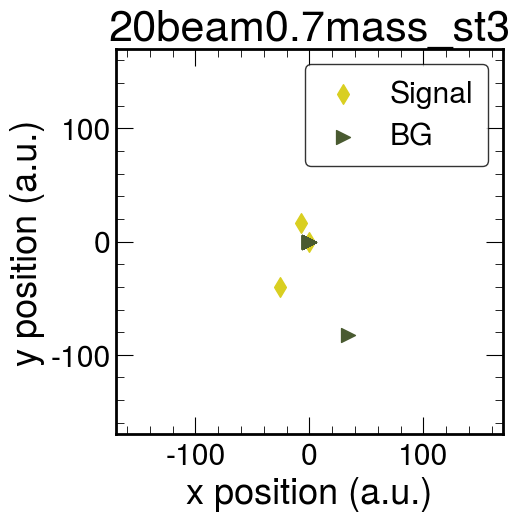

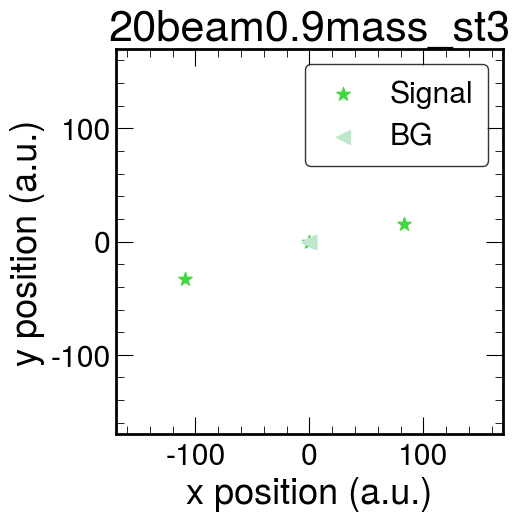

In [234]:
Num_event_plot = 1

for path in Signal_path[:]:
    file = uproot.open(path)
    print(path, '\n',file.keys())
    file_key = file.keys()
    
    
    for keys in file_key:
        Event2 = file[keys]
        DATA = pd.DataFrame()
        
        if features[1] not in Event2.keys():
            break

        for i in range(0,len(features)):
            # print(Event2[0].array())
            temp = Event2[features[i]].array()
            if 'var' in str(temp.type):
                new_coloumn = [] 
                for j in range(len(temp)):
                    new_coloumn.append(list(temp[j]))
                res = new_coloumn
            else:
                res = np.array(temp)
            
            DATA[features[i]] = res
    
    
    plt.figure(figsize = (5,5))

    for i in range(Num_event_plot):
        rand_num = np.random.randint(0, len(DATA))
        rand_colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
        plt.scatter(DATA['truthtrack_x_st3'][rand_num],DATA['truthtrack_y_st3'][rand_num], marker=random.choice(['o','v','^','>','<','s','p','*','h','H','D','d']), c = rand_colors[0], s = 100, label = 'Signal')
    
    # background
    file = uproot.open(BG_path)
    print(path, '\n',file.keys())
    file_key = file.keys()
    
    
    for keys in file_key:
        Event2 = file[keys]
        DATA = pd.DataFrame()
        
        if features[1] not in Event2.keys():
            break

        for i in range(0,len(features)):
            # print(Event2[0].array())
            temp = Event2[features[i]].array()
            if 'var' in str(temp.type):
                new_coloumn = [] 
                for j in range(len(temp)):
                    new_coloumn.append(list(temp[j]))
                res = new_coloumn
            else:
                res = np.array(temp)
            
            DATA[features[i]] = res

    for i in range(Num_event_plot):
        rand_num = np.random.randint(0, len(DATA))
        rand_colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
        plt.scatter(DATA['truthtrack_x_st3'][rand_num],DATA['truthtrack_y_st3'][rand_num], marker=random.choice(['o','v','^','>','<','s','p','*','h','H','D','d']), c = rand_colors[0], s = 100, label = 'BG')
    
    plt.xlim(-170, 170)
    plt.ylim(-170, 170)
    plt.xlabel('x position (a.u.)', loc = 'center')
    plt.ylabel('y position (a.u.)', loc = 'center')
    plt.title(path[:-21]+'_st3')
    leg = plt.legend(frameon=True)
    leg.get_frame().set_edgecolor('k')
    plt.savefig('new/'+path[:-5]+'_xy_st3.png',bbox_inches='tight')

### Repeat for one file

15beam0.3mass_hepmc_displaced.root 
 ['Events;2', 'Events;1']
DY_simPU_NEW_FULL_Mar14.root 
 ['Events;1']


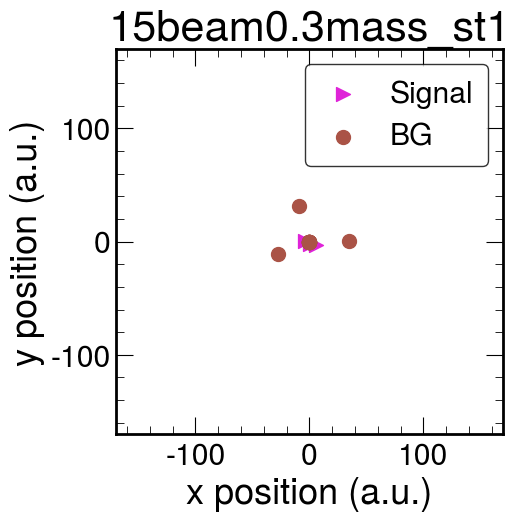

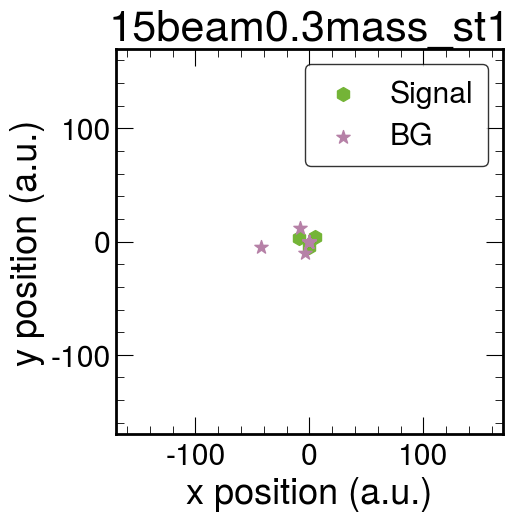

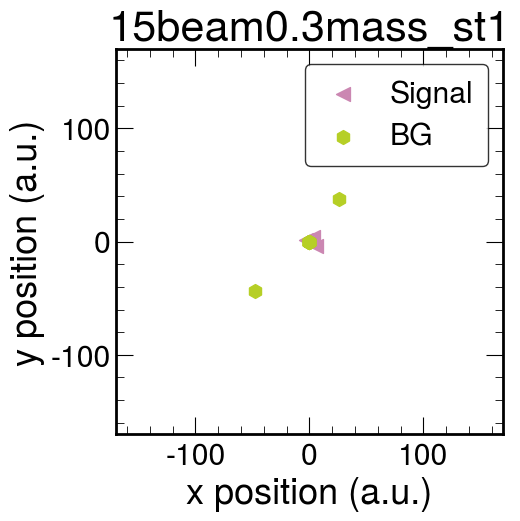

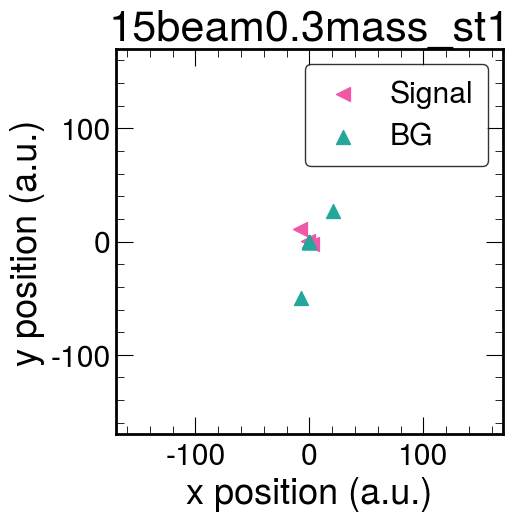

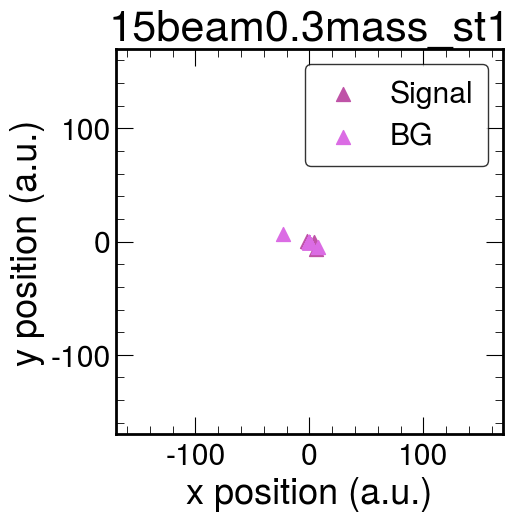

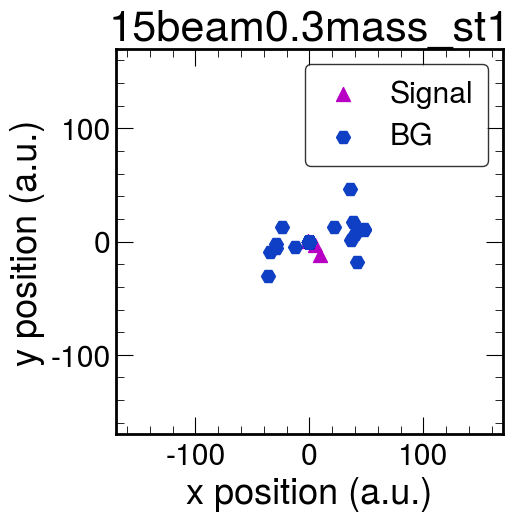

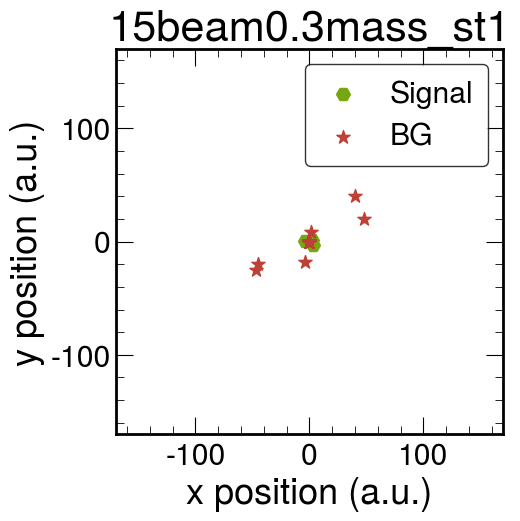

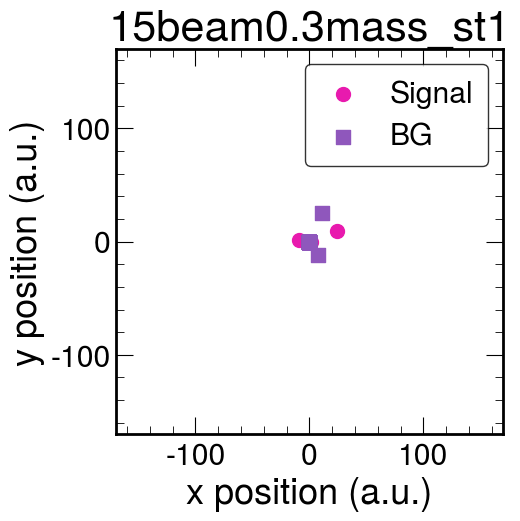

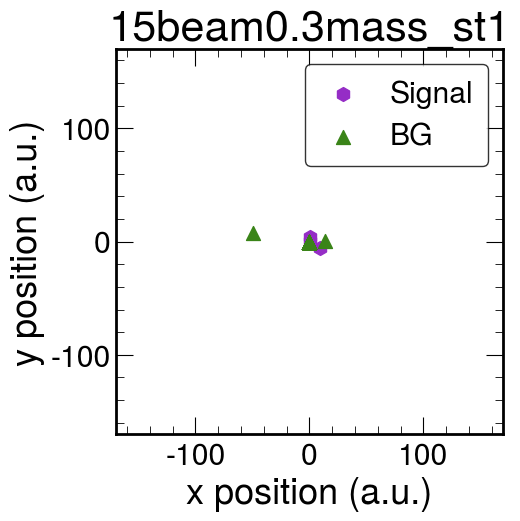

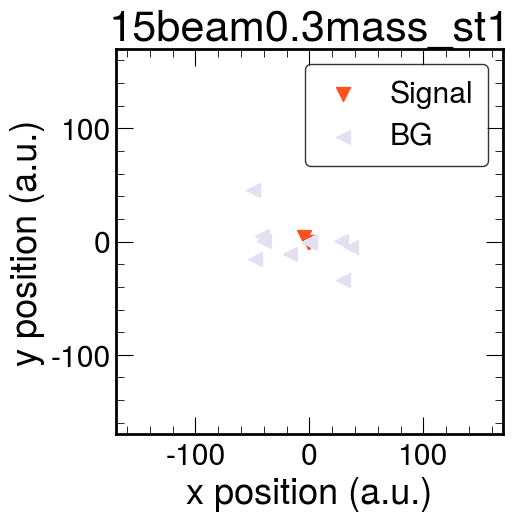

In [220]:
Num_event_plot = 1
repeat_time = 10

for path in Signal_path[0:1]:
    # read signal
    
    file = uproot.open(path)
    print(path, '\n',file.keys())
    file_key = file.keys()
    
    for keys in file_key:
        Event2 = file[keys]
        DATA_siganl = pd.DataFrame()
        
        if features[1] not in Event2.keys():
            break

        for i in range(0,len(features)):
            # print(Event2[0].array())
            temp = Event2[features[i]].array()
            if 'var' in str(temp.type):
                new_coloumn = [] 
                for j in range(len(temp)):
                    new_coloumn.append(list(temp[j]))
                res = new_coloumn
            else:
                res = np.array(temp)
            
            DATA_siganl[features[i]] = res
    
    # read background
    file = uproot.open(BG_path)
    print(BG_path, '\n',file.keys())
    file_key = file.keys()
    
    for keys in file_key:
        Event2 = file[keys]
        DATA_BG = pd.DataFrame()
        
        if features[1] not in Event2.keys():
            break

        for i in range(0,len(features)):
            # print(Event2[0].array())
            temp = Event2[features[i]].array()
            if 'var' in str(temp.type):
                new_coloumn = [] 
                for j in range(len(temp)):
                    new_coloumn.append(list(temp[j]))
                res = new_coloumn
            else:
                res = np.array(temp)
            
            DATA_BG[features[i]] = res
    
    for repeat in range(repeat_time):    
        # plt figure
        plt.figure(figsize = (5,5))

        for i in range(Num_event_plot):
            rand_num = np.random.randint(0, len(DATA_siganl))
            rand_colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
            plt.scatter(DATA_siganl['truthtrack_x_st1'][rand_num],DATA_siganl['truthtrack_y_st1'][rand_num], marker=random.choice(['o','v','^','>','<','s','p','*','h','H','D','d']), c = rand_colors[0], s = 100, label = 'Signal')
        
        for i in range(Num_event_plot):
            rand_num = np.random.randint(0, len(DATA_BG))
            rand_colors = ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
            plt.scatter(DATA_BG['truthtrack_x_st1'][rand_num],DATA_BG['truthtrack_y_st1'][rand_num], marker=random.choice(['o','v','^','>','<','s','p','*','h','H','D','d']), c = rand_colors[0], s = 100, label = 'BG')
        
        plt.xlim(-170, 170)
        plt.ylim(-170, 170)
        plt.xlabel('x position (a.u.)', loc = 'center')
        plt.ylabel('y position (a.u.)', loc = 'center')
        plt.title(path[:-21]+'_st1')
        leg = plt.legend(frameon=True)
        leg.get_frame().set_edgecolor('k')
        plt.savefig('new/'+path[:-5]+'_'+str(repeat)+'_xy_st1.png',bbox_inches='tight')

### Display the GNN result

In [222]:
Path_res = 'F:/PHYS_570/Project/result/Visual'
os.chdir(Path_res)

file_path = glob.glob('*.tfevents')
file_path

['15_03.tfevents',
 '15_03_05.tfevents',
 '15_05.tfevents',
 '15_07.tfevents',
 '15_07_09.tfevents',
 '15_09.tfevents',
 '20_03.tfevents',
 '20_03_05.tfevents',
 '20_05.tfevents',
 '20_07.tfevents',
 '20_07_09.tfevents',
 '20_09.tfevents']

In [223]:
# print all tags from the data
v_tag = []
path_to_events_file = file_path[0]

for e in summary_iterator(path_to_events_file):
    for v in e.summary.value:
        v_tag.append(v.tag)
        
v_tag

['train/focal',
 'train/total',
 'train/AUROC/',
 'train/Partial_AUROC/',
 'train/recall_on_max_fpr/',
 'train/recall_on_max_fpr_over_10/',
 'ROC_Curve/train',
 'TriggerRate_Curve/train',
 'TriggerRate/train',
 'Confusion Matrix - max_fpr/train',
 'Confusion Matrix - max_fpr_over_10/train',
 'valid/focal',
 'valid/total',
 'valid/AUROC/',
 'valid/Partial_AUROC/',
 'valid/recall_on_max_fpr/',
 'valid/recall_on_max_fpr_over_10/',
 'ROC_Curve/valid',
 'TriggerRate_Curve/valid',
 'TriggerRate/valid',
 'Confusion Matrix - max_fpr/valid',
 'Confusion Matrix - max_fpr_over_10/valid',
 'test /focal',
 'test /total',
 'test /AUROC/',
 'test /Partial_AUROC/',
 'test /recall_on_max_fpr/',
 'test /recall_on_max_fpr_over_10/',
 'ROC_Curve/test ',
 'TriggerRate_Curve/test ',
 'TriggerRate/test ',
 'Confusion Matrix - max_fpr/test ',
 'Confusion Matrix - max_fpr_over_10/test ',
 'best/best_epoch',
 'best/best_val_recall',
 'best/best_test_recall',
 'train/focal',
 'train/total',
 'train/AUROC/',
 'tr

0.9274285435676575
0.9505714178085327
0.8165714144706726
0.75342857837677
0.7565714120864868
0.569428563117981
0.9617142677307129
0.9208571314811707
0.9514285922050476
0.8539999723434448
0.911142885684967
0.7168571352958679


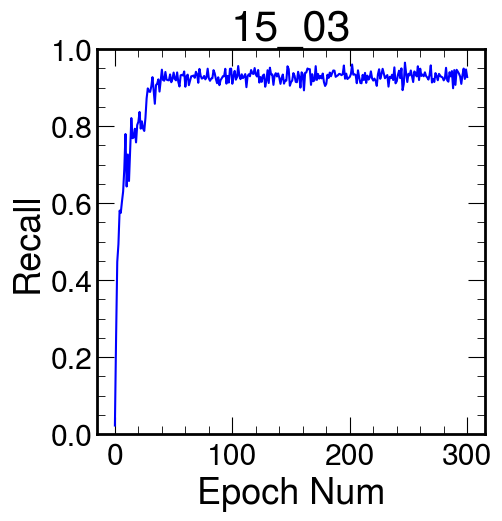

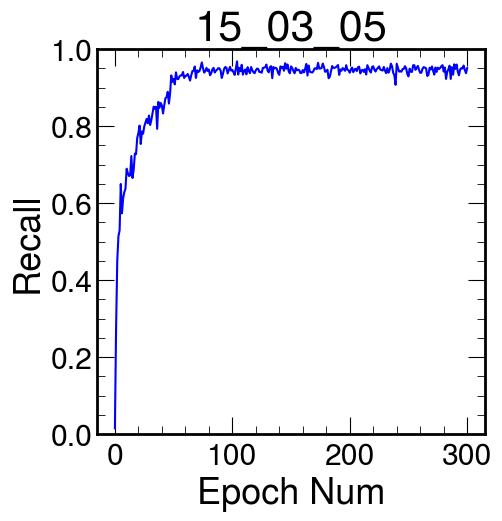

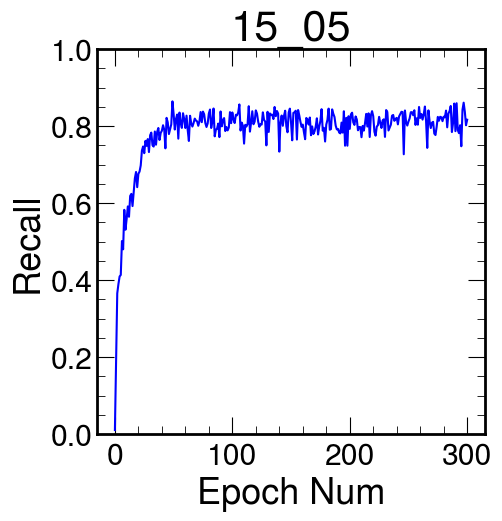

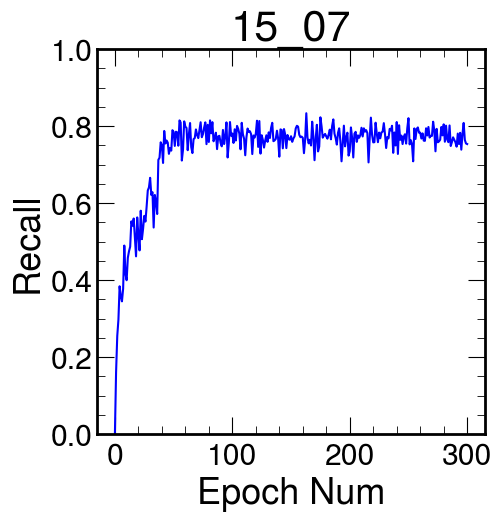

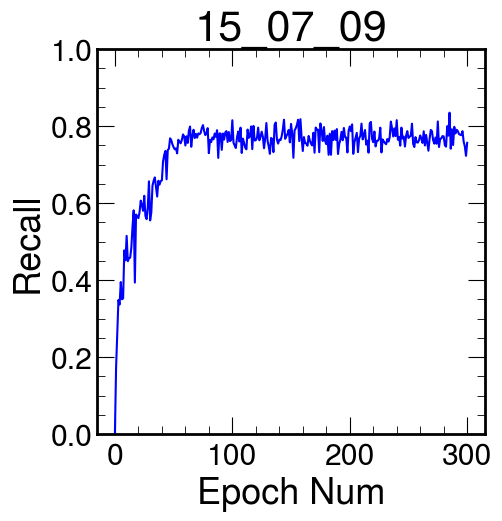

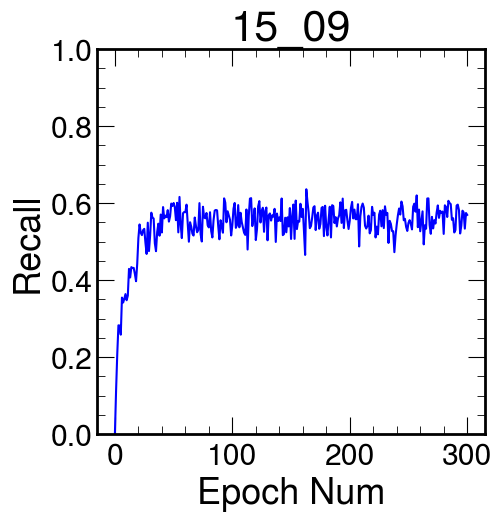

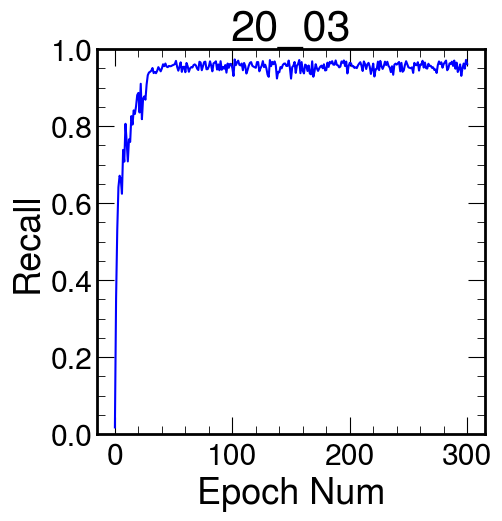

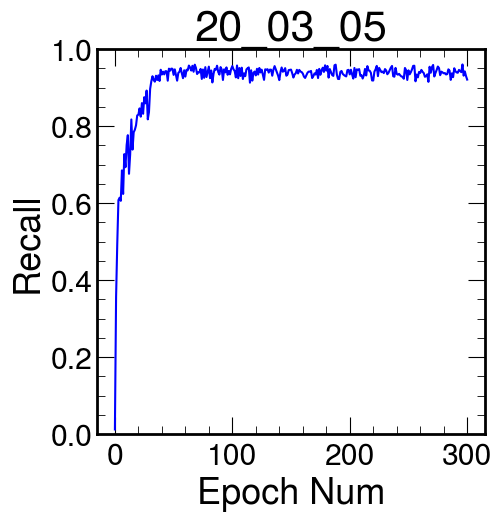

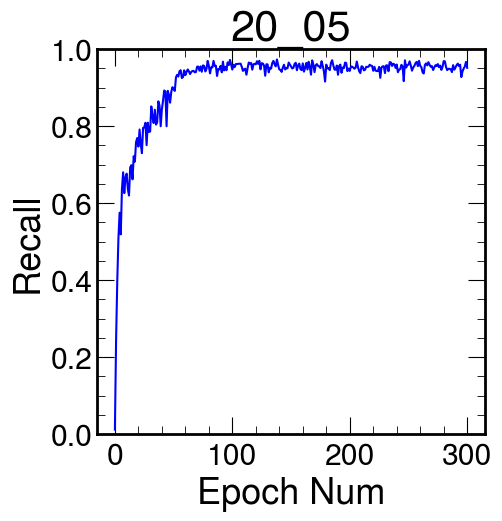

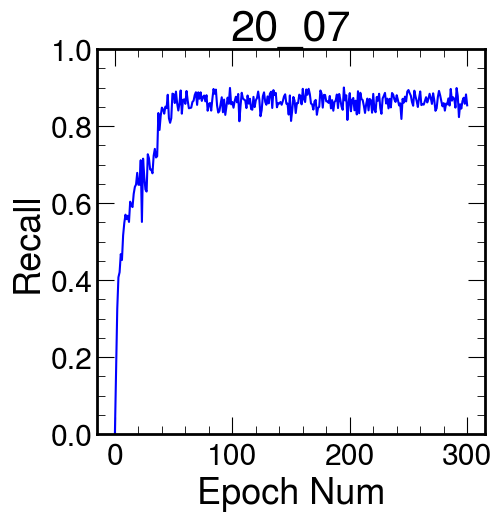

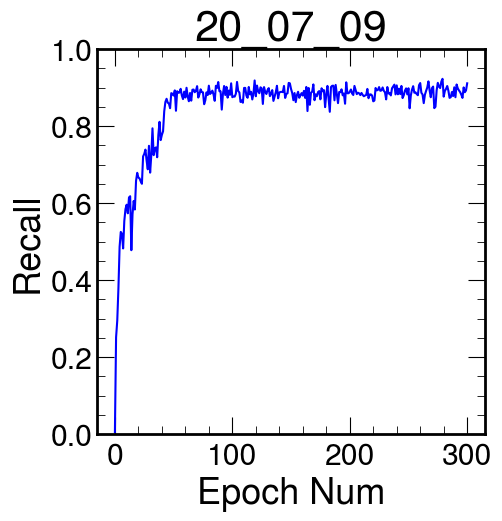

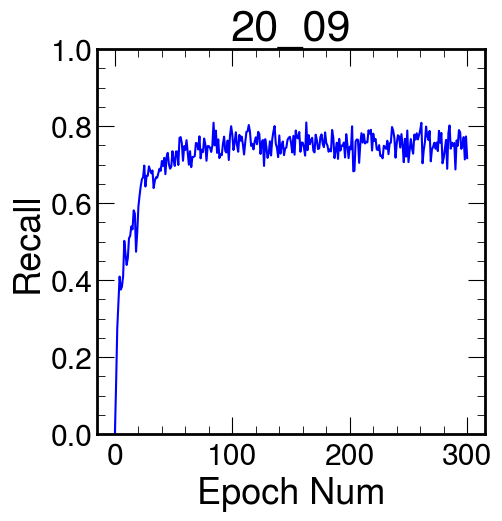

In [225]:
v_tag = ['train/recall_on_max_fpr/']

for path_to_events_file in file_path:
    for i in range(len(v_tag)):
        aim_tag = []
        for e in summary_iterator(path_to_events_file):    
            for v in e.summary.value:
            
                if v.tag == v_tag[i]:
                    aim_tag.append(v.simple_value)
            
        plt.figure(figsize = (5,5))
        plt.xlabel('Epoch Num', loc = 'center')
        plt.ylabel('Recall', loc = 'center')
        plt.plot(aim_tag, 'b')
      
        plt.ylim((0, 1)) 
        # plt.xlim((0, 300))
        plt.title(path_to_events_file[:-9])
        # plt.savefig(path_to_events_file[:-9] + '_Recall.png', bbox_inches='tight')
        # 'new/' + path_to_events_file[:-9] + '_Recall.png'
        plt.savefig('Recall_train/' + path_to_events_file[:-9] + '_Recall.png', bbox_inches='tight')
    print(aim_tag[-1])        

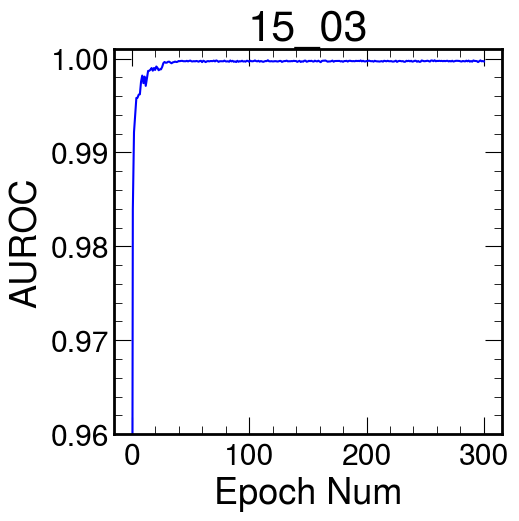

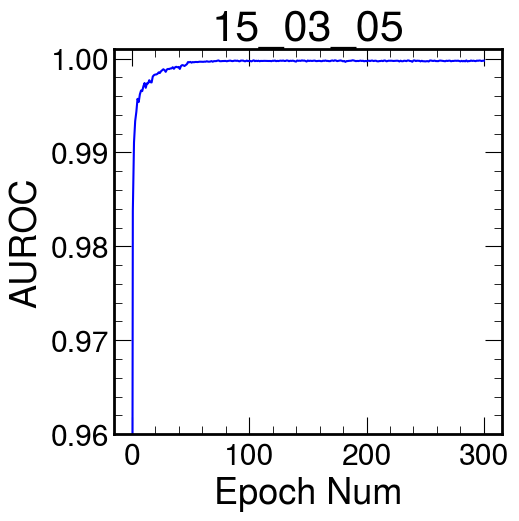

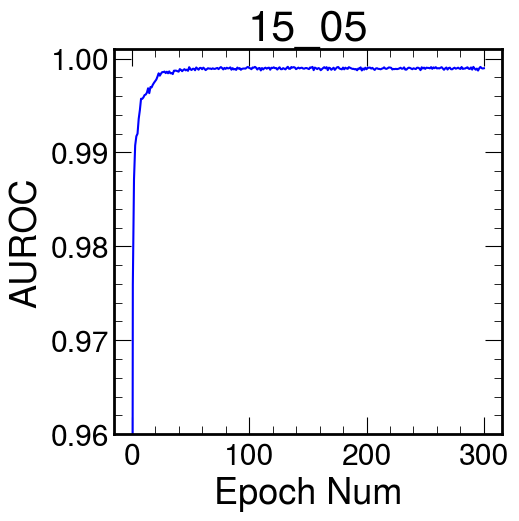

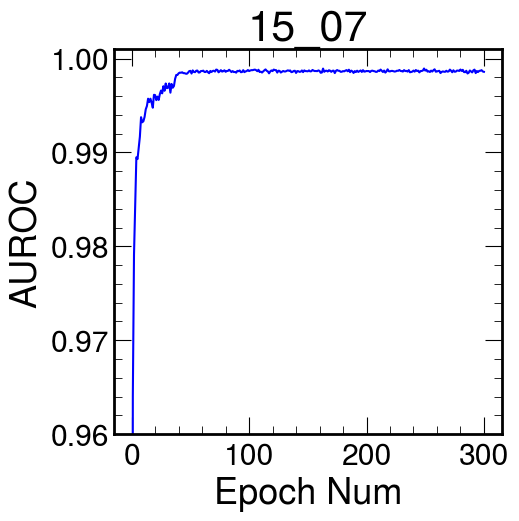

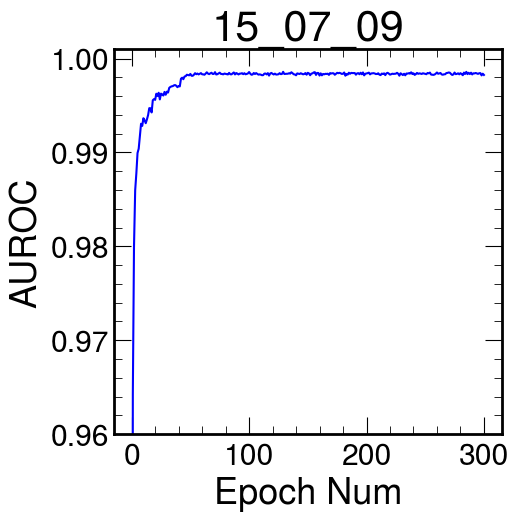

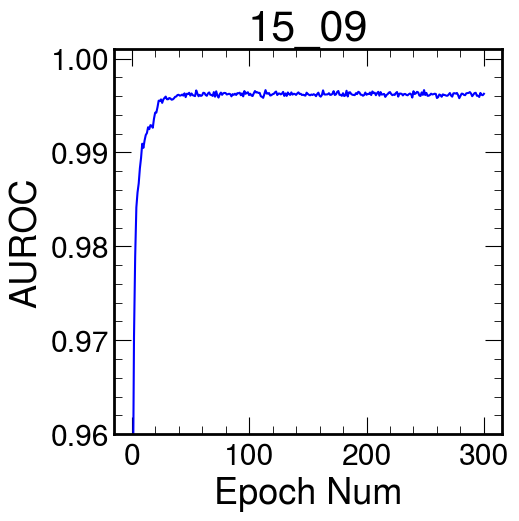

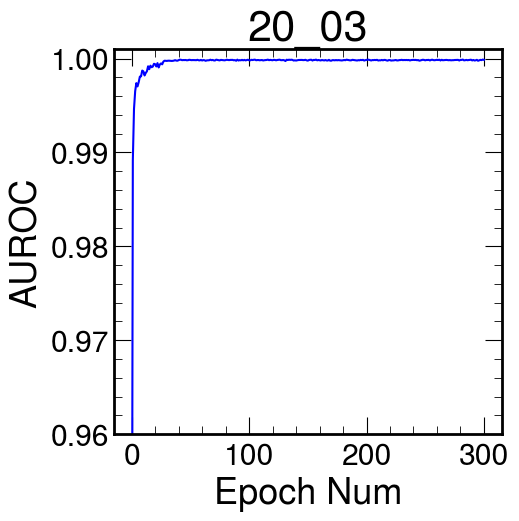

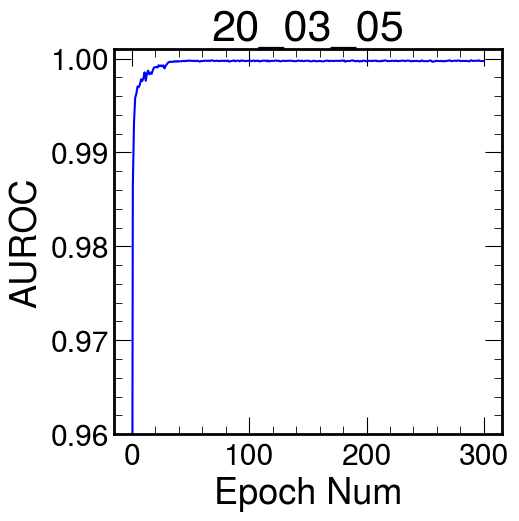

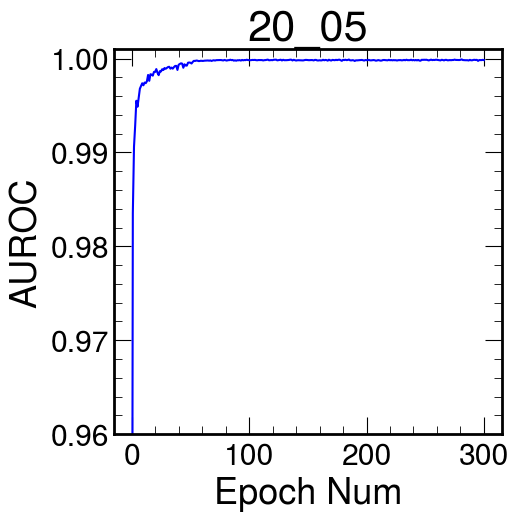

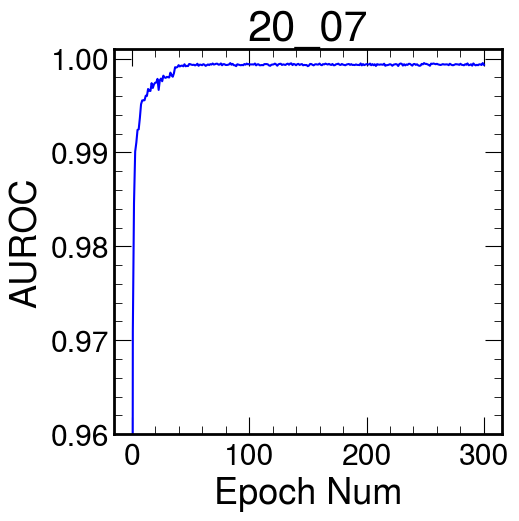

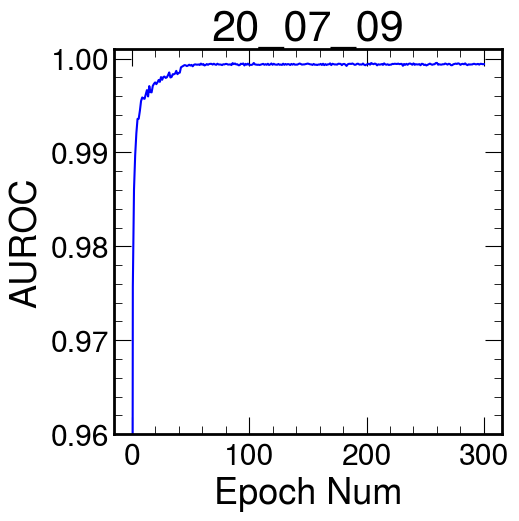

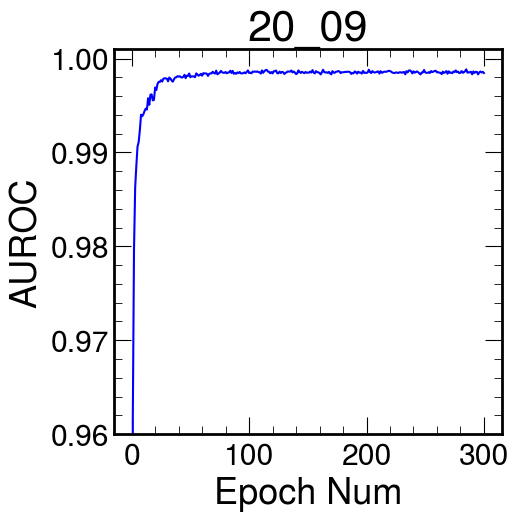

In [171]:
v_tag = ['train/AUROC/']

for path_to_events_file in file_path:
    for i in range(len(v_tag)):
        aim_tag = []
        for e in summary_iterator(path_to_events_file):    
            for v in e.summary.value:
            
                if v.tag == v_tag[i]:
                    aim_tag.append(v.simple_value)
            
        plt.figure(figsize = (5,5))
        plt.xlabel('Epoch Num', loc = 'center')
        plt.ylabel('AUROC', loc = 'center')
        plt.plot(aim_tag, 'b')
        # plt.title(v_tag[i])
        plt.ylim((0.96, 1.001)) 
        # # plt.xlim((0, 300))
        plt.title(path_to_events_file[:-9])
        plt.savefig('Auroc_train/' + path_to_events_file[:-9] + '_AUROC.png', bbox_inches='tight')

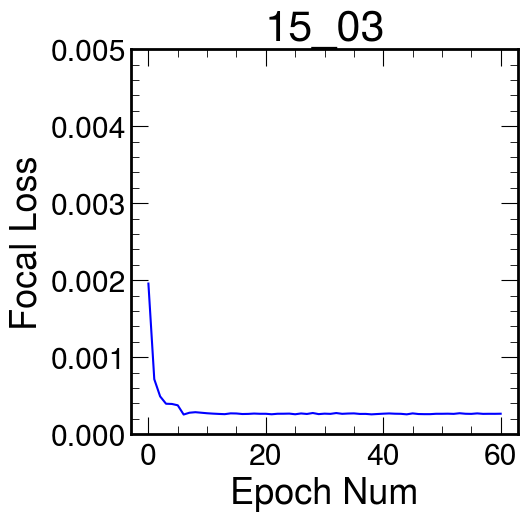

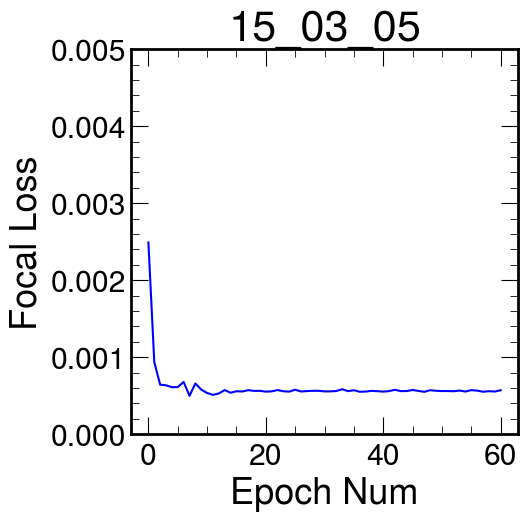

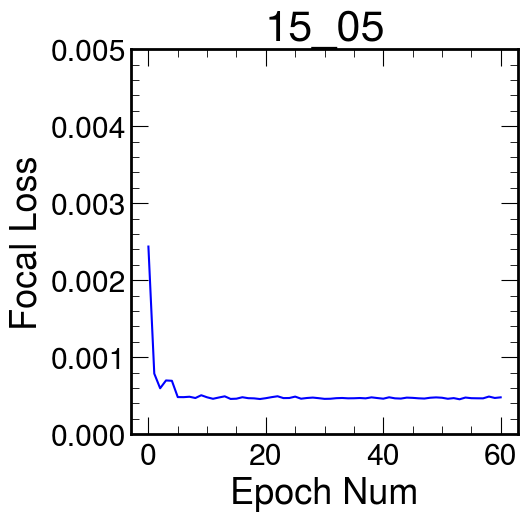

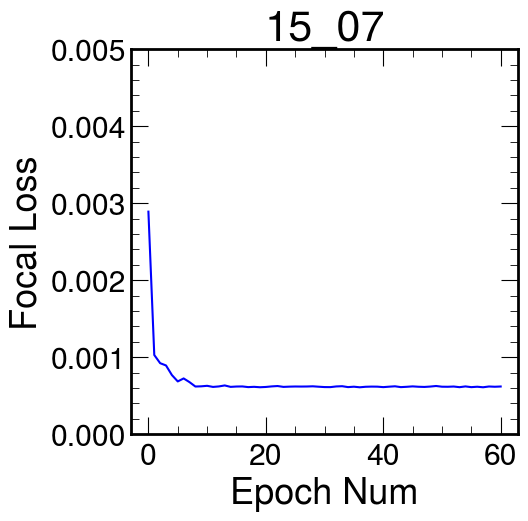

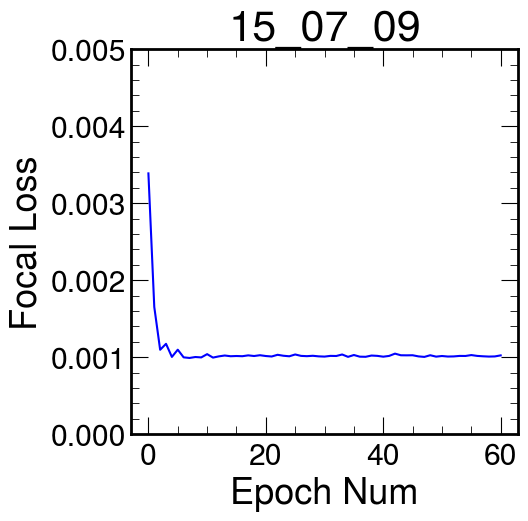

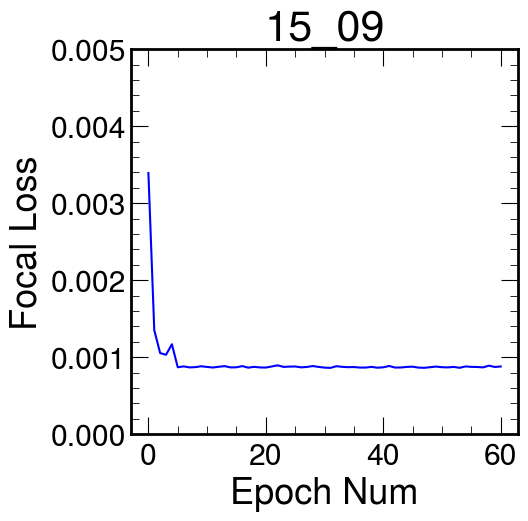

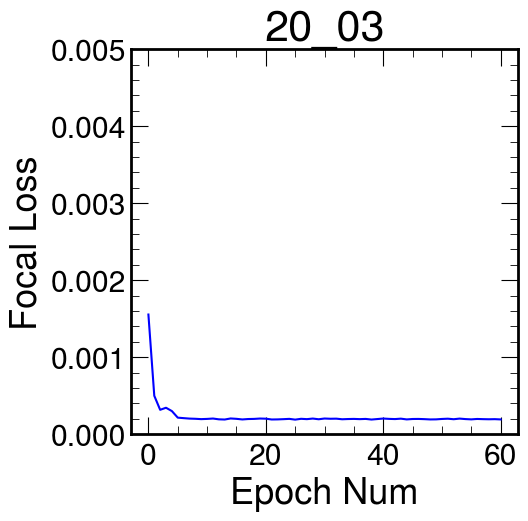

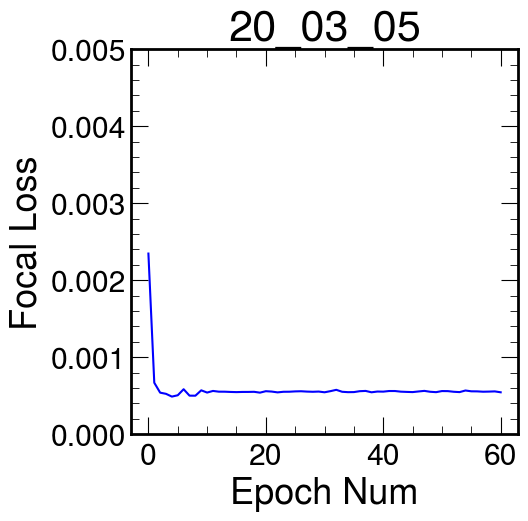

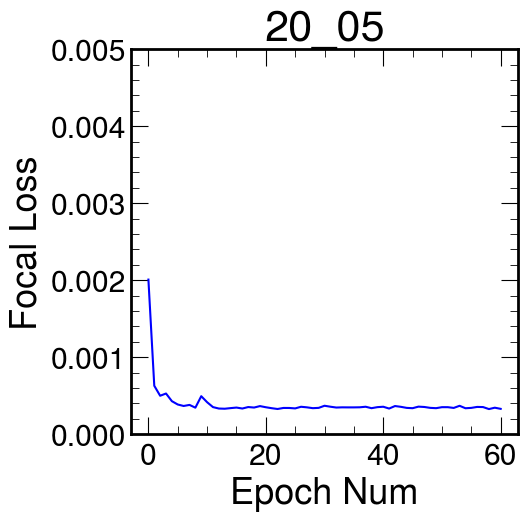

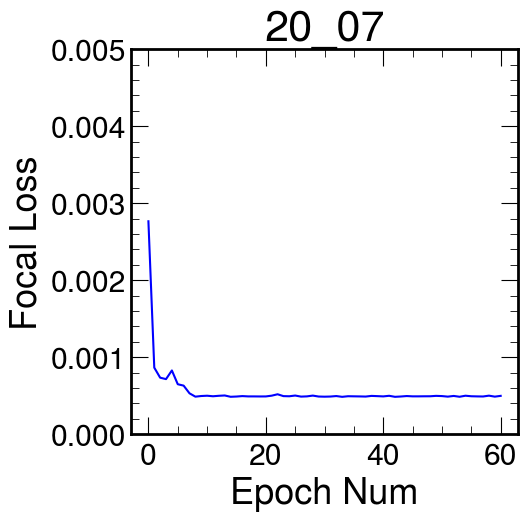

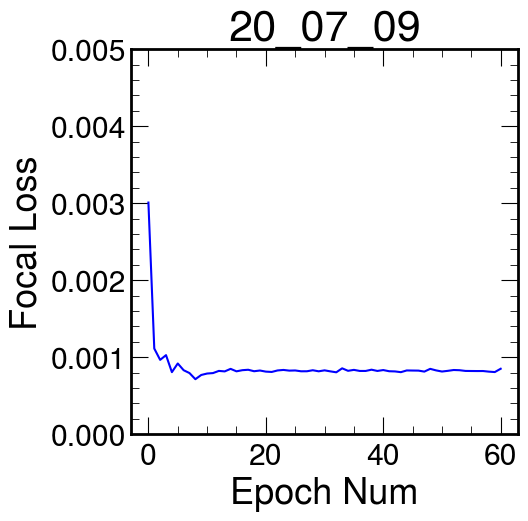

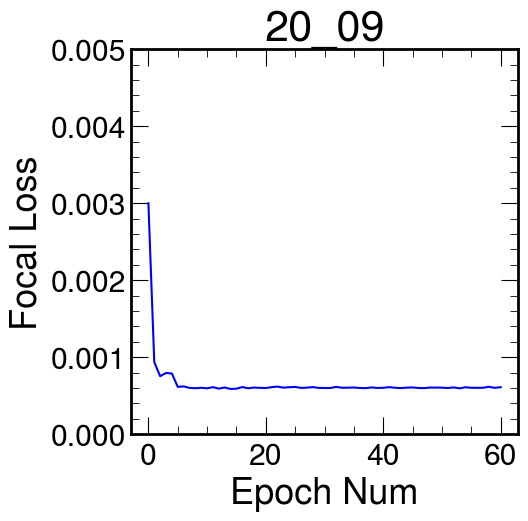

In [227]:
v_tag = ['test /focal']

for path_to_events_file in file_path:
    for i in range(len(v_tag)):
        aim_tag = []
        for e in summary_iterator(path_to_events_file):    
            for v in e.summary.value:
            
                if v.tag == v_tag[i]:
                    aim_tag.append(v.simple_value)
            
        plt.figure(figsize = (5,5))
        plt.xlabel('Epoch Num', loc = 'center')
        plt.ylabel('Focal Loss', loc = 'center')
        plt.plot(aim_tag, 'b')
        # plt.title(v_tag[i])
        plt.ylim((0, 0.005)) 
        # # plt.xlim((0, 300))
        plt.title(path_to_events_file[:-9])
        plt.savefig('Focal_loss_test/' + path_to_events_file[:-9] + '_Focal_Loss.png', bbox_inches='tight')